Estimated Params from opt.curve_fit: [-1.66301087 -0.0026884   1.00995394]
Estimated Params from algebraic solution: 0.1814976417680323 0.0015625447615624337
Estimated Params from algebraicV2 solution: 0.6199863972734008 -547.8044818169894


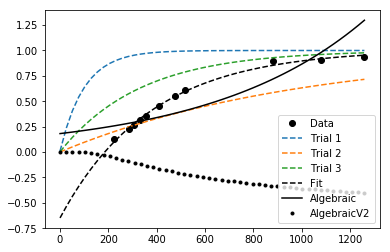

In [171]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

#data
T_values = np.array([222, 284, 308.5, 333, 358, 411, 477, 518, 880, 1080, 1259])
C_values = np.array([0.1282, 0.2308, 0.2650, 0.3120 , 0.3547, 0.4530, 0.5556, 0.6154,\
                     0.8932, 0.9103, 0.9316])
x_samp = T_values
y_samp = C_values

#function to optimize
def func (x, A, c, d):
    #print (c)
    return A * np.exp (c * x) + d

#trials
plt.plot (x_samp, y_samp, "ko", label = "Data")
x_lin = np.linspace(1, x_samp.max(), 50)                   # 50 evenly spaced digits between 0 and max

A, c, d = -1, -1e-2, 1
y_trial1 = func(x_lin,  A,     c, d)
y_trial2 = func(x_lin, -1, -1e-3, 1)
y_trial3 = func(x_lin, -1, -3e-3, 1)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")

#optimize.curve_fit
p0 = [-1, -3e-3, 1]
w, _ = opt.curve_fit (func, x_samp, y_samp, p0)
print ("Estimated Params from opt.curve_fit:", w)
y_model = func (x_lin, *w)
plt.plot (x_lin, y_model, "k--", label = "Fit")

#algebraic - y = be^ax
# c = [ln b, a] = inv(AA').(A'.z); A = [1 x], z = ln y
import math

def func2 (x, b, a):
    return b * np.exp (a * x)

#works for this data
#x_samp2 = np.array([2.0774, 2.3049 , 3.0125 , 4.7092 , 5.5016])
#y_samp2 = np.array([1.4509, 2.8462, 2.1536, 4.7438, 7.7260])

#doesn't work for x_samp/y_samp data
A = np.column_stack ((np.ones(11), x_samp))
z = np.log (y_samp)
ATA = (A.T).dot(A)
ATAI = np.linalg.inv(ATA)
ATZ = (A.T).dot(z)
c = (ATAI).dot(ATZ)
b = math.exp (c[0])
a = c[1]
y_model2 = func2 (x_lin, b, a)
print ("Estimated Params from algebraic solution:", b, a)
plt.plot (x_lin, y_model2, "k-", label = "Algebraic")

#algebraicV2 - y = -be^a(1/x)
# c = [ln 1/b, a] = inv(AA').(A'.z); A = [1 1/x], z = ln y

def func3 (x, b, a):
    aBYx = a / (x * 1.0)
    return -b * np.exp (aBYx)

A = np.column_stack ((np.ones(11), 1. / x_samp))
z = np.log (y_samp)
ATA = (A.T).dot(A)
ATAI = np.linalg.inv(ATA)
ATZ = (A.T).dot(z)
c = (ATAI).dot(ATZ)
b = 1/ float (math.exp (c[0]))
a = c[1]
y_model3 = func3 (x_lin, b, a)
print ("Estimated Params from algebraicV2 solution:", b, a)
plt.plot (x_lin, y_model3, "k.", label = "AlgebraicV2")

#show plot
plt.legend()
plt.show()

b_temp and b 1.6129386134886785 0.6199863972734008
Estimated Params from algebraic solution: 0.6199863972734008 -547.8044818169894


Estimated Params from algebraic solution: 0.7670003116942542 0.4040237088187637


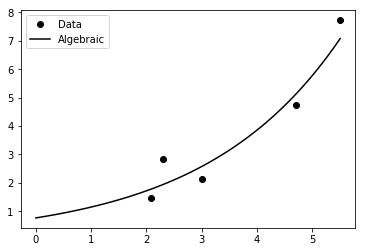

In [160]:
#works for this data
x_samp2 = np.array([2.0774, 2.3049 , 3.0125 , 4.7092 , 5.5016])
y_samp2 = np.array([1.4509, 2.8462, 2.1536, 4.7438, 7.7260])
x_lin = np.linspace(0, x_samp2.max(), 50)

#doesn't work for x_samp/y_samp data
A = np.column_stack ((np.ones(5), x_samp2))
z = np.log (y_samp2)
ATA = (A.T).dot(A)
ATAI = np.linalg.inv(ATA)
ATZ = (A.T).dot(z)
c = (ATAI).dot(ATZ)
b = math.exp (c[0])
a = c[1]
y_model2 = func2 (x_lin, b, a)
print ("Estimated Params from algebraic solution:", b, a)
plt.plot (x_samp2, y_samp2, "ko", label = "Data")
plt.plot (x_lin, y_model2, "k-", label = "Algebraic")

#show plot
plt.legend()
plt.show()

y-intercept is 1.1666530868022196 slope is 1.104407969189545


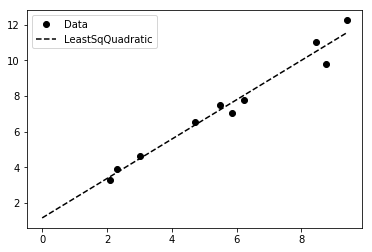

In [196]:
#algebraic: f(x) = a0 + a1 * x
x_samp3 = np.array([2.0774 , 2.3049 , 3.0125 , 4.7092 , 5.5016 , 5.8704 , 6.2248 , \
                    8.4431 , 8.7594 ,  9.3900])
y_samp3 = np.array([3.3123, 3.8982, 4.6500, 6.5576, 7.5173, 7.0415, 7.7497, 11.0451,\
                    9.8179,  12.2477])
m = 10
SX = np.sum (x_samp3)
SX2 = np.sum (np.square (x_samp3))
SY = np.sum (y_samp3)
SXY = np.sum (np.multiply (x_samp3, y_samp3))
a0 = (np.multiply (SX2, SY) - np.multiply (SX, SXY)) / (np.multiply (m, SX2)\
                                                        - np.multiply (SX, SX))
a1 = (-np.multiply (SX, SY) + np.multiply (m, SXY)) /  (np.multiply (m, SX2)\
                                                        - np.multiply (SX, SX))
print ('y-intercept is', a0, 'slope is', a1)
plt.plot (x_samp3, y_samp3, "ko", label="Data")

#plot the line
x_lin = np.linspace(0, x_samp3.max(), 50)
y_model3 = a0 + a1 * x_lin
plt.plot (x_lin, y_model3, "k--", label="LeastSqQuadratic")

#show plot
plt.legend()
plt.show()

In [197]:
#matrix solution
A = np.column_stack ((np.ones(m), x_samp3))
Z = y_samp3
ATA = (A.T).dot(A)
ATAI = np.linalg.inv (ATA)
ATZ = (A.T).dot (Z)
C = ATAI.dot (ATZ)
print ('y-intercept is', C[0], 'slope is', C[1])

y-intercept is 1.1666530868022207 slope is 1.1044079691895456


In [193]:
#matrix solution redundant
A = np.array([m, SX, SX, SX2])
A = A.reshape (2,2)
Z = np.array([SY, SXY])
Z = Z.reshape (2, 1)
ATA = (A.T).dot(A)
ATAI = np.linalg.inv (ATA)
ATZ = (A.T).dot (Z)
C = ATAI.dot (ATZ)
print ('y-intercept is', C[0], 'slope is', C[1])

y-intercept is [1.16665309] slope is [1.10440797]


[ 4.76810925 -1.5193514   0.42511883]


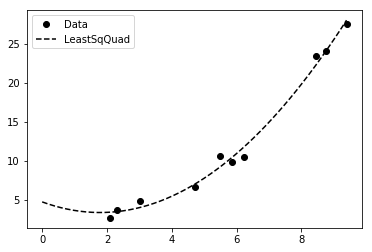

In [203]:
#Algebraic - y = a2 * x^2 + a1 * x + a0
x_samp4 = np.array([2.0774 , 2.3049 , 3.0125 , 4.7092 , 5.5016 , 5.8704 , 6.2248 \
                    , 8.4431 , 8.7594 ,  9.3900])
y_samp4 = np.array([2.7212, 3.7798, 4.8774, 6.6596, 10.5966, 9.8786, 10.5232, \
                    23.3574, 24.0510,  27.4827])
A = np.column_stack ((np.ones(m), x_samp4, np.multiply (x_samp4, x_samp4)))
Z = y_samp4
ATA = (A.T).dot(A)
ATAI = np.linalg.inv (ATA)
ATZ = (A.T).dot (Z)
C = ATAI.dot (ATZ)
print (C) #[ 4.76810925 -1.5193514   0.42511883]

def func4 (x, a0, a1, a2):
    return a0 + a1*x + a2*x*x

x_lin4 = np.linspace (0, x_samp4.max(), 50)
y_model4 = func4 (x_lin, C[0], C[1], C[2])

#plot
plt.plot (x_samp4, y_samp4, 'ko', label='Data')
plt.plot (x_lin4, y_model4, 'k--', label='LeastSqQuad')

plt.legend ()
plt.show()